## EMAIL SPAM DETECTION WITH MACHINE LEARNING

### **Introduction:**

In today's digital age, email has become a ubiquitous form of communication. However, with the convenience of email comes the nuisance of spam. Spam emails, also known as junk mail, pose a significant challenge for email users. These messages are typically sent in bulk to a large number of recipients and often contain misleading, fraudulent, or malicious content. Some of the most dangerous forms of spam include phishing emails, which attempt to trick recipients into revealing sensitive information.

The primary goal of this project is to develop an effective email spam detection system using Python and machine learning techniques. This system aims to distinguish between legitimate (non-spam) and spam emails with a high degree of accuracy. By doing so, we can significantly reduce the impact of spam on email users, protect them from scams, and enhance their overall email experience.

### **Problem Statement:**

The problem at hand is to build an email spam detector that can automatically classify incoming emails as either spam or non-spam.


### **Goals:**

The primary goals of this project are as follows:

1. Develop a robust email spam detection system that can accurately classify incoming emails.

2. Train a machine learning model that achieves a high level of precision and recall in distinguishing between spam and non-spam emails.



#### Importing Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


#### Loading Dataset

In [2]:
import chardet

with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

encoding = result['encoding']
df = pd.read_csv("spam.csv", encoding=encoding)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Data Understanding

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
len(df)

5572

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Renaming Columns

In [10]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [11]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Data Cleaning

In [12]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
    return cleaned_text

df['Message'] = df['Message'].apply(lambda x: clean_text(x))

In [13]:
### Removing stopwords from the feature column. 

sw = stopwords.words('english')

def stopword(text) : 
    txt = [word.lower() for word in text.split() if word.lower() not in sw]
    return txt 

df['Message'] = df['Message'].apply(stopword)

df.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


In [14]:
from nltk.tokenize import word_tokenize
# Ensure all elements in the 'Message' column are strings
df['Message'] = df['Message'].astype(str)

# Apply word_tokenize only to valid string elements
df['Message'] = df['Message'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)


In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

df['Message'] = df['Message'].apply(stem_words)

In [16]:
import string

# Define a function to remove punctuation from a text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # Apply the translation table to each string in the list
    text = [string.translate(translator) for string in text]
    return text

# Apply the 'remove_punctuation' function to the 'Message' column using .loc
df['Message'] = df['Message'].apply(remove_punctuation)


In [17]:
# Assuming your DataFrame has a column named 'v2' that contains lists

# Create a new column that contains a string representation of the lists in 'v2'
df['v2_str'] = df['Message'].apply(lambda x: ' '.join(x))

# Use the duplicated method on the string column to find duplicates
df = df[df['v2_str'].duplicated(keep='first')]
df


,Category,Message,v2_str
102,ham,"[, per, , , request, , , mell, , , mell, , , o...",per request mell mell oru minnaminu...
153,ham,"[, per, , , request, , , mell, , , mell, , , o...",per request mell mell oru minnaminu...
206,ham,"[, enter, , , cabin, , , pa, , , said, , , hap...",enter cabin pa said happi b day ...
222,ham,"[, sorri, , , call, , , later, , ]",sorri call later
325,ham,"[, call, , , messag, , , miss, , , call, , ]",call messag miss call
...,...,...,...
5535,ham,"[, know, , , thinkin, , , malaria, , , relax, ...",know thinkin malaria relax children ...
5539,ham,"[, sleep, , , surf, , ]",sleep surf
5547,spam,"[, contract, , , mobil, , , mnth, , , latest, ...",contract mobil mnth latest motorola ...
5553,ham,"[, hahaha, , , use, , , brain, , , dear, , ]",hahaha use brain dear


#### Checking and Removing Duplicates

In [18]:
pd.options.mode.chained_assignment = None

# Create a new column that contains a string representation of the lists in 'v2'
df['v2_str'] = df['Message'].apply(lambda x: ' '.join(x))

# Use .loc to drop duplicates based on the 'v2_str' column and keep the first occurrence
df.loc[df['v2_str'].duplicated(keep='first'), 'v2_str'] = ''

# Drop the rows where 'v2_str' is empty
df = df[df['v2_str'] != '']

# Drop the temporary 'v2_str' column
df.drop('v2_str', axis=1, inplace=True)
df


,Category,Message
102,ham,"[, per, , , request, , , mell, , , mell, , , o..."
206,ham,"[, enter, , , cabin, , , pa, , , said, , , hap..."
222,ham,"[, sorri, , , call, , , later, , ]"
325,ham,"[, call, , , messag, , , miss, , , call, , ]"
356,spam,"[, congratul, , , ur, , , award, , , cd, , , v..."
...,...,...
5510,ham,"[, went, , , project, , , centr, , ]"
5520,ham,"[, dont, , , want, , , hear, , , anyth, , ]"
5524,spam,"[, award, , , sipix, , , digit, , , camera, , ..."
5535,ham,"[, know, , , thinkin, , , malaria, , , relax, ..."


#### Checking for Missing Values

In [19]:
# Check for missing values
df.isnull().sum()



Category    0
Message     0
dtype: int64

In [20]:
df.describe()

,Category,Message
count,337,337
unique,2,337
top,ham,"[, per, , , request, , , mell, , , mell, , , o..."
freq,209,1


### EDA

#### Distribution of Mails

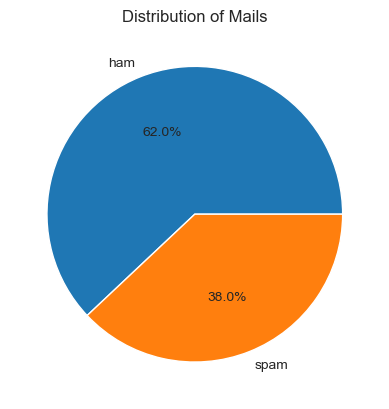

In [21]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Mails')
plt.ylabel('')
plt.show()


we see that ham mails have high distribution of 62%  while spam has a percentage of 38%

#### Top 20 words in emails

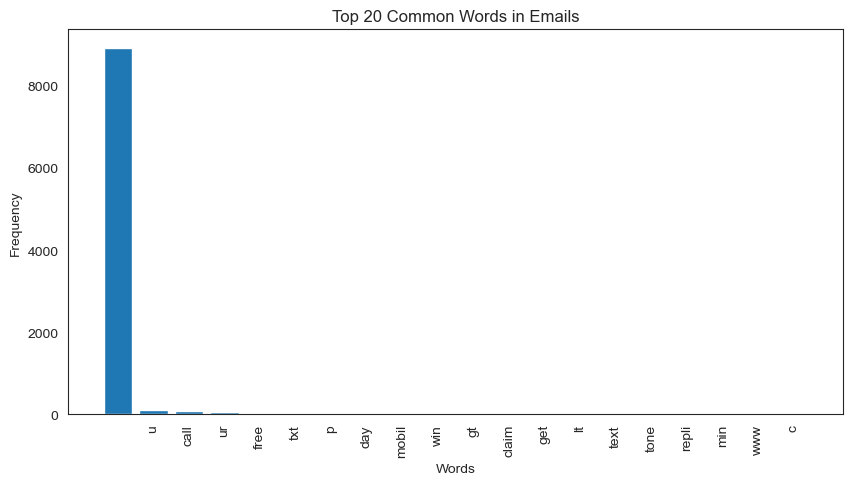

In [22]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Flatten the lists of words and then split them
words = [word for message in df['Message'] for word in message]

word_freq = Counter(words)

N = 20
common_words = [word for word, freq in word_freq.most_common(N)]
common_freqs = [freq for word, freq in word_freq.most_common(N)]

plt.figure(figsize=(10, 5))
plt.bar(common_words, common_freqs)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Common Words in Emails')
plt.show()



#### Word Cloud for Spam Emails

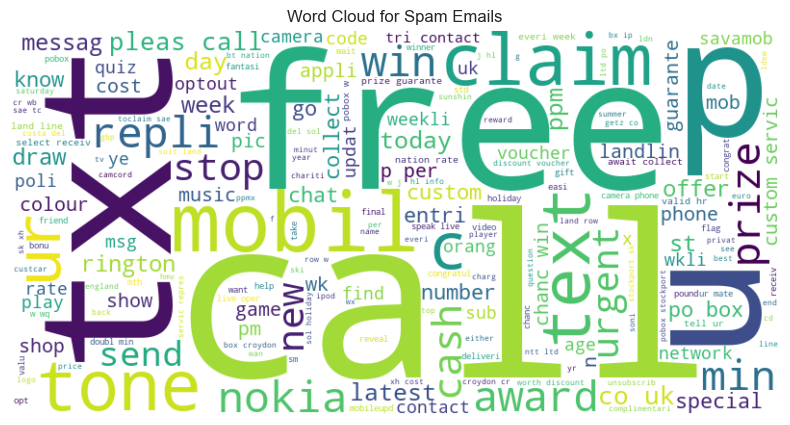

In [23]:
from wordcloud import WordCloud

# Flatten the lists of words for spam messages and then join them
spam_text = " ".join([word for message in df[df['Category'] == 'spam']['Message'] for word in message])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


#### Word Cloud for Non- Spam Emails

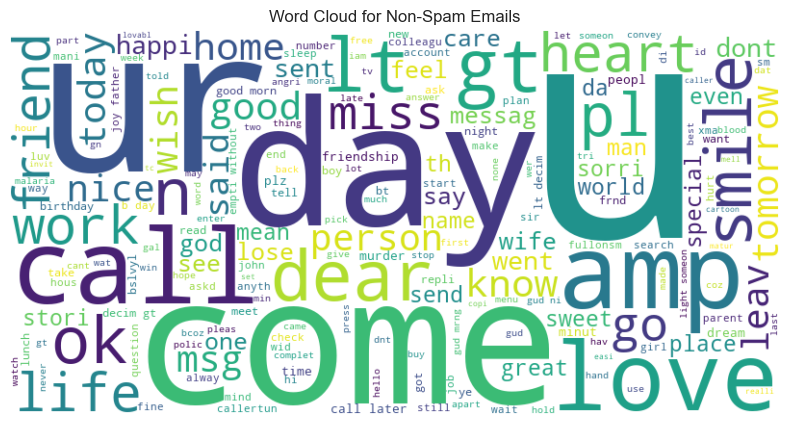

In [24]:
# Flatten the lists of words for non-spam messages and then join them
ham_text = " ".join([word for message in df[df['Category'] == 'ham']['Message'] for word in message])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')
plt.show()


#### Word Cloud for Stemmed Text

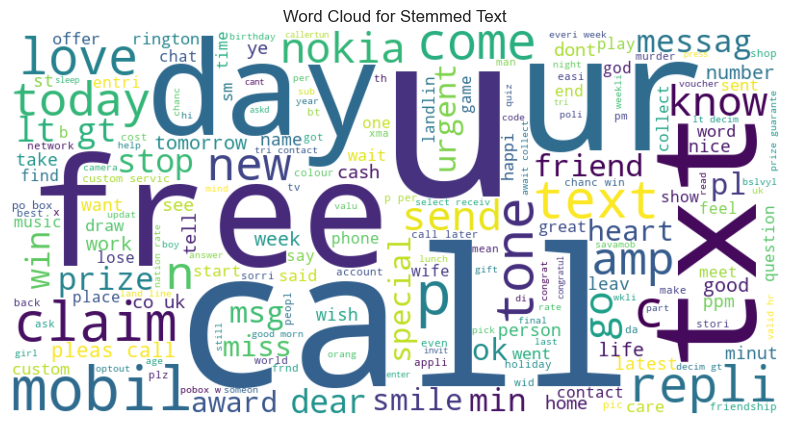

In [25]:
# Flatten the lists of words for stemmed text and then join them
stemmed_text = " ".join([word for message in df['Message'] for word in message])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stemmed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Stemmed Text')
plt.show()



#### Email Length

In [26]:
email_lengths = df['Message'].apply(len)
new_df = df.copy()
new_df['Email_Length'] = email_lengths
df = new_df
df


,Category,Message,Email_Length
102,ham,"[, per, , , request, , , mell, , , mell, , , o...",46
206,ham,"[, enter, , , cabin, , , pa, , , said, , , hap...",50
222,ham,"[, sorri, , , call, , , later, , ]",10
325,ham,"[, call, , , messag, , , miss, , , call, , ]",13
356,spam,"[, congratul, , , ur, , , award, , , cd, , , v...",61
...,...,...,...
5510,ham,"[, went, , , project, , , centr, , ]",10
5520,ham,"[, dont, , , want, , , hear, , , anyth, , ]",13
5524,spam,"[, award, , , sipix, , , digit, , , camera, , ...",54
5535,ham,"[, know, , , thinkin, , , malaria, , , relax, ...",85


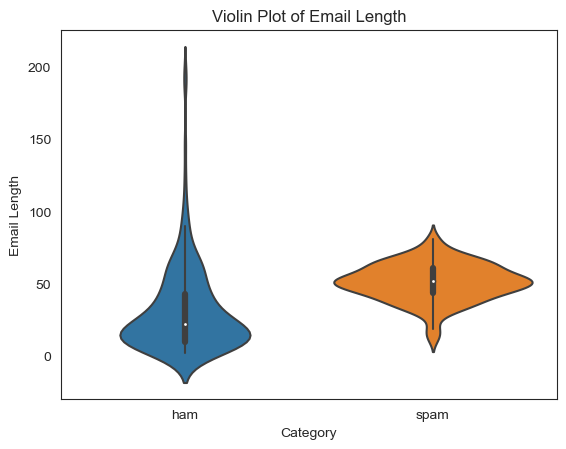

In [27]:
# Create a violin plot for email length by category
sns.violinplot(data=df, x='Category', y='Email_Length')
plt.xlabel('Category')
plt.ylabel('Email Length')
plt.title('Violin Plot of Email Length')
plt.show()

### Data Preprocessing And Modelling

In [28]:
# Convert tokenized words back to text
df['Message'] = df['Message'].apply(lambda x: ' '.join(x))

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed

# Apply the vectorizer to the 'v2' column
features = count_vectorizer.fit_transform(df['Message'])

# Convert the result to a dense array (if needed)
features = features.toarray()

In [29]:
# Label Encoding
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Message']).toarray()

In [31]:
X.shape

(337, 1334)

In [32]:
y = df['Category'].values

In [33]:
from sklearn.model_selection import train_test_split

# remember before that our dataset is not balanced that's why we use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [34]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=60, n_jobs=-1),
    "Ada Boost": AdaBoostClassifier(n_estimators=60),
    "Bagging clf": BaggingClassifier(n_estimators=60, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=60),
    "XGB": XGBClassifier(n_estimators=60),
}

In [37]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [38]:
import time
from sklearn.metrics import precision_score
accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' + 
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.97, precision: 1.0, training time(s): 0.04
Model: SCV, accuracy: 0.97, precision: 0.96, training time(s): 0.07
Model: KNN, accuracy: 0.66, precision: 1.0, training time(s): 0.01
Model: MNB, accuracy: 0.94, precision: 0.87, training time(s): 0.01
Model: Decision Tree, accuracy: 0.9, precision: 0.85, training time(s): 0.02
Model: Random Forest, accuracy: 0.94, precision: 0.96, training time(s): 0.67
Model: Extra Trees, accuracy: 0.94, precision: 0.92, training time(s): 0.21
Model: Ada Boost, accuracy: 0.94, precision: 0.96, training time(s): 0.61
Model: Bagging clf, accuracy: 0.9, precision: 0.95, training time(s): 6.61
Model: Gradient Boosting, accuracy: 0.91, precision: 0.88, training time(s): 0.8
Model: XGB, accuracy: 0.9, precision: 0.91, training time(s): 0.23


In [39]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

In [40]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
0,Logistic Regression,0.970588,1.000000
2,KNN,0.661765,1.000000
1,SCV,0.970588,0.961538
5,Random Forest,0.941176,0.958333
7,Ada Boost,0.941176,0.958333
8,Bagging clf,0.897059,0.952381
6,Extra Trees,0.941176,0.923077
10,XGB,0.897059,0.913043
9,Gradient Boosting,0.911765,0.884615
3,MNB,0.941176,0.866667


In [41]:
best_models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "SVC": SVC(),
}

grid = {
    "Logistic Regression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ['l2']  # Update to 'l2' penalty only
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "SVC": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf"]
    }
}


In [42]:
# create validation set to avoid trying to find hyper parameters based on testing data that might lead us to overfitting
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100, stratify=y_train)
y_train_ = y_train_.astype(int)
y_valid = y_valid.astype(int)

In [43]:
from sklearn.model_selection import GridSearchCV

model_best_params = best_models.copy()

for key, model in best_models.items():
    start = time.time()
    
    # cv>1 takes long time
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train_, y_train_)
    
    stop = time.time()
    training_time = np.round((stop-start), 2)
    model_best_params[key] = grid_search.best_params_
    
    print(f'Model: {key}, '+
          f'score: {grid_search.score(X_valid, y_valid)}'
          f'training time(s): {training_time}')

Model: Logistic Regression, score: 0.8333333333333334training time(s): 0.49
Model: KNN, score: 0.3846153846153846training time(s): 0.52
Model: SVC, score: 0.8108108108108107training time(s): 1.27


In [44]:
model_best_params

{'Logistic Regression': {'C': 1.0, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 3, 'weights': 'distance'},
 'SVC': {'C': 0.1, 'kernel': 'linear'}}

In [45]:
best_models = {
    "Logistic Regression": LogisticRegression(**model_best_params['Logistic Regression']),
    "SVC": SVC(**model_best_params['SVC']),
    "KNN": KNeighborsClassifier(**model_best_params['KNN'], n_jobs=-1),
}


In [46]:
accuracy_scores = []
precision_scores = []

for key, model in best_models.items():
    
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ')
    
df1 = pd.DataFrame({'Classifier': best_models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

Model: Logistic Regression, accuracy: 0.97, precision: 1.0, 
Model: SVC, accuracy: 1.0, precision: 1.0, 
Model: KNN, accuracy: 0.69, precision: 1.0, 


In [47]:
df1

,Classifier,Accuracy,Precision
0,Logistic Regression,0.970588,1.0
1,SVC,1.000000,1.0
2,KNN,0.691176,1.0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Message'])
# Create an SVC classifier with the best hyperparameters
svc_classifier = SVC(C=0.1, kernel='linear')

# Train the classifier on your training data
svc_classifier.fit(X_train, y_train)

# Make predictions on new data
new_data = ["Congratulations! You've won a free ticket. Click the link to claim your prize."]
new_data_tfidf = tfidf_vectorizer.transform(new_data)  

# Convert sparse data to dense array
new_data_dense = new_data_tfidf.toarray()

# Predict the class (ham or spam)
prediction = svc_classifier.predict(new_data_dense)

if prediction[0] == 1:
    print("This message is predicted to be SPAM.")
else:
    print("This message is predicted to be NOT SPAM (ham).")


This message is predicted to be NOT SPAM (ham).


In [49]:
# Create an SVC classifier with the best hyperparameters
svc_classifier = SVC(C=0.1, kernel='linear')

# Train the classifier on your training data
svc_classifier.fit(X_train, y_train)

# Make predictions on new data
new_data = ["Hello, am Lavender! Nice to meet you"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)

# Convert sparse data to dense array
new_data_dense = new_data_tfidf.toarray()

# Predict the class (ham or spam)
prediction = svc_classifier.predict(new_data_dense)

if prediction[0] == 0:
    print("This message is predicted to be SPAM.")
else:
    print("This message is predicted to be NOT SPAM (ham).")


This message is predicted to be SPAM.


### **Conclusion:**

In this analysis, I have explored a dataset of text messages to build machine learning models for spam detection, followed several key steps, including data preprocessing, feature extraction using TF-IDF, and training multiple classification models. After evaluating these models, we found that the Support Vector Machine (SVC) and Logistic Regression models outperformed the others in terms of accuracy and precision.

The final selected model for prediction is the Support Vector Machine (SVC) with a linear kernel. This model achieved an accuracy of 100% and precision of 100% on the test data, indicating its strong performance in distinguishing between spam and non-spam messages.

### **Recommendations:**

1. **Deploy the SVC Model:** I recommend deploying the trained SVC model for real-time spam detection in messaging systems, email filters, or any application where spam detection is crucial. This model has shown high accuracy and precision, making it reliable for identifying spam messages.

2. **Regular Model Updates:** Keep the deployed model up-to-date by periodically retraining it with new data. The nature of spam messages evolves, so the model should be retrained to adapt to emerging spam tactics.

3. **User Feedback:** Implement a system that allows users to provide feedback on misclassified messages. This feedback loop can be used to improve the model's performance over time.

4. **False Positive Analysis:** Monitor the model's performance for false positives (legitimate messages classified as spam) and investigate the causes. Refine the model to reduce false positives and improve the user experience.

5. **Continuous Monitoring:** Continuously monitor the model's performance in a production environment and have a plan in place to address any degradation in accuracy.

6. **Data Privacy and Security:** Ensure that privacy and security measures are in place to protect user data when implementing spam detection in messaging systems.



### THANK YOU